## MLOps Zoomcamp — Week 01 Homework

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_parquet('data/yellow_tripdata_2022-01.parquet')

### Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data

In [30]:
df.shape[1]

19

### Question 2:  Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data

In [31]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [32]:
df['duration'] = df['duration'].apply(lambda x: x.total_seconds()/60)

In [33]:
df['duration'].std()

46.44530513776499

### Question 3: Fraction of the records left after dropping the outliers

In [34]:
((df['duration'] >= 1) & (df['duration'] <= 60)).sum()/len(df['duration'])

0.9827547930522406

In [35]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

### Question 4: Dimensionality after OHE

In [36]:
X_train = df[['PULocationID', 'DOLocationID']]
y_train = df['duration']

In [37]:
X_train = X_train.astype(str).to_dict(orient='records')

In [38]:
dv = DictVectorizer()

In [39]:
X_train_fe = dv.fit_transform(X_train)

In [40]:
X_train_fe.shape

(2421440, 515)

### Question 5: RMSE on train

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train_fe, y_train)

LinearRegression()

In [43]:
mean_squared_error(y_train, lr.predict(X_train_fe), squared=False)

6.9861901359876795

In [44]:
y_pred = lr.predict(X_train_fe)

/Users/marija/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marija/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

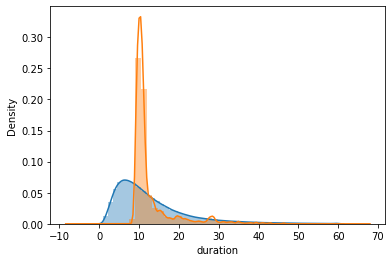

In [45]:
sns.distplot(y_train, label='true')
sns.distplot(y_pred, label='prediction')

### Question 6: RMSE on validation

In [46]:
df_test = pd.read_parquet('data/yellow_tripdata_2022-02.parquet')

In [47]:
df_test['duration'] = (df_test['tpep_dropoff_datetime'] - df_test['tpep_pickup_datetime']).apply(lambda x: x.total_seconds()/60)

In [48]:
df_test = df_test[(df_test['duration'] >= 1) & (df_test['duration'] <= 60)]

In [49]:
X_test = df_test[['PULocationID', 'DOLocationID']]
y_test = df_test['duration']

In [50]:
X_test = X_test.astype(str).to_dict(orient='records')

In [51]:
X_test_fe = dv.transform(X_test)

In [52]:
mean_squared_error(y_test, lr.predict(X_test_fe), squared=False)

7.78638951042692

In [53]:
y_pred = lr.predict(X_test_fe)

/Users/marija/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marija/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

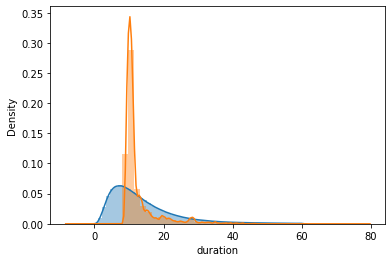

In [54]:
sns.distplot(y_test, label='true')
sns.distplot(y_pred, label='prediction')